In [93]:
#Import libraries and tools for geomap analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gdp
import seaborn as sns

In [2]:
#load the GeoJSON file
geo_data = gdp.read_file('POSTFIRE_MASTER_DATA_SHARE_140463065990229786.geojson')

#Display first row
print(geo_data.head())

   OBJECTID           DAMAGE  STREETNUMBER     STREETNAME STREETTYPE  \
0         1        No Damage        8376.0   Quail Canyon       Road   
1         2  Affected (1-9%)        8402.0   Quail Canyon       Road   
2         3        No Damage        8430.0  Quail Canyon        Road   
3         4        No Damage        3838.0    Putah Creek       Road   
4         5        No Damage        3830.0    Putah Creek       Road   

  STREETSUFFIX     CITY STATE  ZIPCODE CALFIREUNIT  ...  \
0         None  Winters    CA      NaN         LNU  ...   
1         None  Winters    CA      NaN         LNU  ...   
2         None  Winters    CA      NaN         LNU  ...   
3         None  Winters    CA      NaN         LNU  ...   
4         None  Winters    CA      NaN         LNU  ...   

  UTILITYMISCSTRUCTUREDISTANCE FIRENAME         APN ASSESSEDIMPROVEDVALUE  \
0                         None    Quail  0101090290              510000.0   
1                         None    Quail  0101090270       

<Axes: >

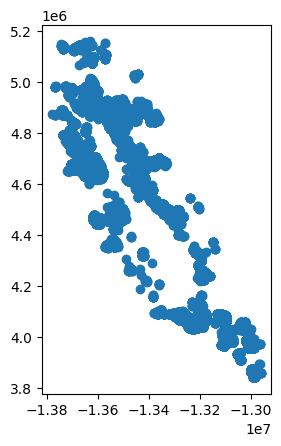

In [3]:
#Place the data into plot
geo_data.plot()

In [4]:
#pip install contextily

In [5]:
import contextily as ctx

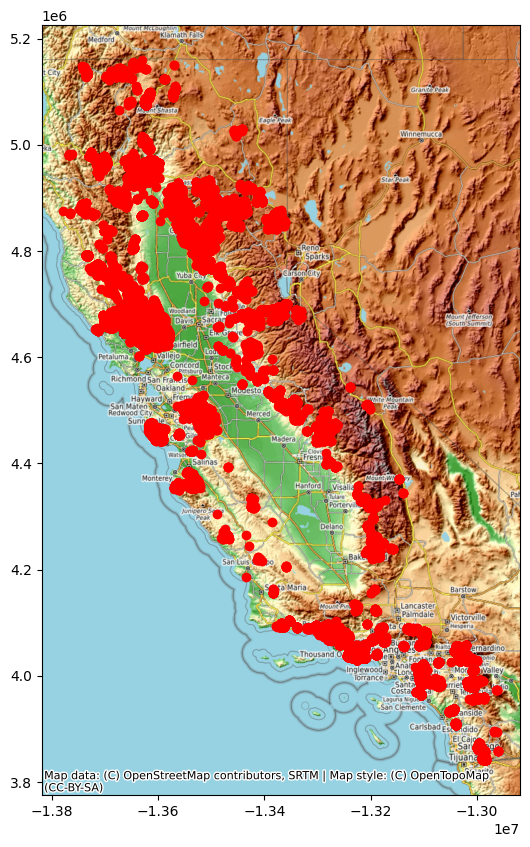

In [6]:
geo_data.to_crs(epsg='4462')

fig, ax= plt.subplots(figsize=(10,10))

geo_data.plot(ax=ax, color='r')
ctx.add_basemap(ax, source=ctx.providers.OpenTopoMap)

In [7]:
geo_data.columns

Index(['OBJECTID', 'DAMAGE', 'STREETNUMBER', 'STREETNAME', 'STREETTYPE',
       'STREETSUFFIX', 'CITY', 'STATE', 'ZIPCODE', 'CALFIREUNIT', 'COUNTY',
       'COMMUNITY', 'BATTALION', 'INCIDENTNAME', 'INCIDENTNUM',
       'INCIDENTSTARTDATE', 'HAZARDTYPE', 'WHEREFIRESTARTEDONSTRUCTURE',
       'WHATDIDFIRESTARTFROM', 'DEFENSIVEACTIONS', 'STRUCTURETYPE',
       'STRUCTURECATEGORY', 'NUMBEROFUNITPERSTRUCTURE',
       'NOOUTBUILDINGSDAMAGED', 'NOOUTBUILDINGSNOTDAMAGED', 'ROOFCONSTRUCTION',
       'EAVES', 'VENTSCREEN', 'EXTERIORSIDING', 'WINDOWPANE',
       'DECKPORCHONGRADE', 'DECKPORCHELEVATED', 'PATIOCOVERCARPORT',
       'FENCEATTACHEDTOSTRUCTURE', 'PROPANETANKDISTANCE',
       'UTILITYMISCSTRUCTUREDISTANCE', 'FIRENAME', 'APN',
       'ASSESSEDIMPROVEDVALUE', 'YEARBUILT', 'SITEADDRESS', 'GLOBALID',
       'Latitude', 'Longitude', 'geometry'],
      dtype='object')

In [42]:
new_geo_data = geo_data.copy()

new_geo_data = pd.DataFrame(new_geo_data)

In [43]:
new_geo_data.columns = [col.lower() for col in new_geo_data.columns]

print(new_geo_data.columns)

Index(['objectid', 'damage', 'streetnumber', 'streetname', 'streettype',
       'streetsuffix', 'city', 'state', 'zipcode', 'calfireunit', 'county',
       'community', 'battalion', 'incidentname', 'incidentnum',
       'incidentstartdate', 'hazardtype', 'wherefirestartedonstructure',
       'whatdidfirestartfrom', 'defensiveactions', 'structuretype',
       'structurecategory', 'numberofunitperstructure',
       'nooutbuildingsdamaged', 'nooutbuildingsnotdamaged', 'roofconstruction',
       'eaves', 'ventscreen', 'exteriorsiding', 'windowpane',
       'deckporchongrade', 'deckporchelevated', 'patiocovercarport',
       'fenceattachedtostructure', 'propanetankdistance',
       'utilitymiscstructuredistance', 'firename', 'apn',
       'assessedimprovedvalue', 'yearbuilt', 'siteaddress', 'globalid',
       'latitude', 'longitude', 'geometry'],
      dtype='object')


In [44]:
#Adding a new column 'Decade' to group the year built by 10
new_geo_data['decade'] = (new_geo_data['yearbuilt'] // 10) * 10

new_geo_data.head()

,objectid,damage,streetnumber,streetname,streettype,streetsuffix,city,state,zipcode,calfireunit,...,firename,apn,assessedimprovedvalue,yearbuilt,siteaddress,globalid,latitude,longitude,geometry,decade
0,1,No Damage,8376.0,Quail Canyon,Road,None,Winters,CA,NaN,LNU,...,Quail,0101090290,510000.0,1997.0,8376 QUAIL CANYON RD VACAVILLE CA 95688,e1919a06-b4c6-476d-99e5-f0b45b070de8,38.474960,-122.044465,POINT (-13585927.697 4646740.75),1990.0
1,2,Affected (1-9%),8402.0,Quail Canyon,Road,None,Winters,CA,NaN,LNU,...,Quail,0101090270,573052.0,1980.0,8402 QUAIL CANYON RD VACAVILLE CA 95688,b090eeb6-5b18-421e-9723-af7c9144587c,38.477442,-122.043252,POINT (-13585792.707 4647093.599),1980.0
2,3,No Damage,8430.0,Quail Canyon,Road,None,Winters,CA,NaN,LNU,...,Quail,0101090310,350151.0,2004.0,8430 QUAIL CANYON RD VACAVILLE CA 95688,268da70b-753f-46aa-8fb1-327099337395,38.479358,-122.044585,POINT (-13585941.007 4647366.034),2000.0
3,4,No Damage,3838.0,Putah Creek,Road,None,Winters,CA,NaN,LNU,...,Quail,0103010240,134880.0,1981.0,3838 PUTAH CREEK RD WINTERS CA 95694,64d4a278-5ee9-414a-8bf4-247c5b5c60f9,38.487313,-122.015115,POINT (-13582660.52 4648497.399),1980.0
4,5,No Damage,3830.0,Putah Creek,Road,None,Winters,CA,NaN,LNU,...,Quail,0103010220,346648.0,1980.0,3830 PUTAH CREEK RD WINTERS CA 95694,1b44b214-01fd-4f06-b764-eb42a1ec93d7,38.485636,-122.016122,POINT (-13582772.601 4648258.826),1980.0


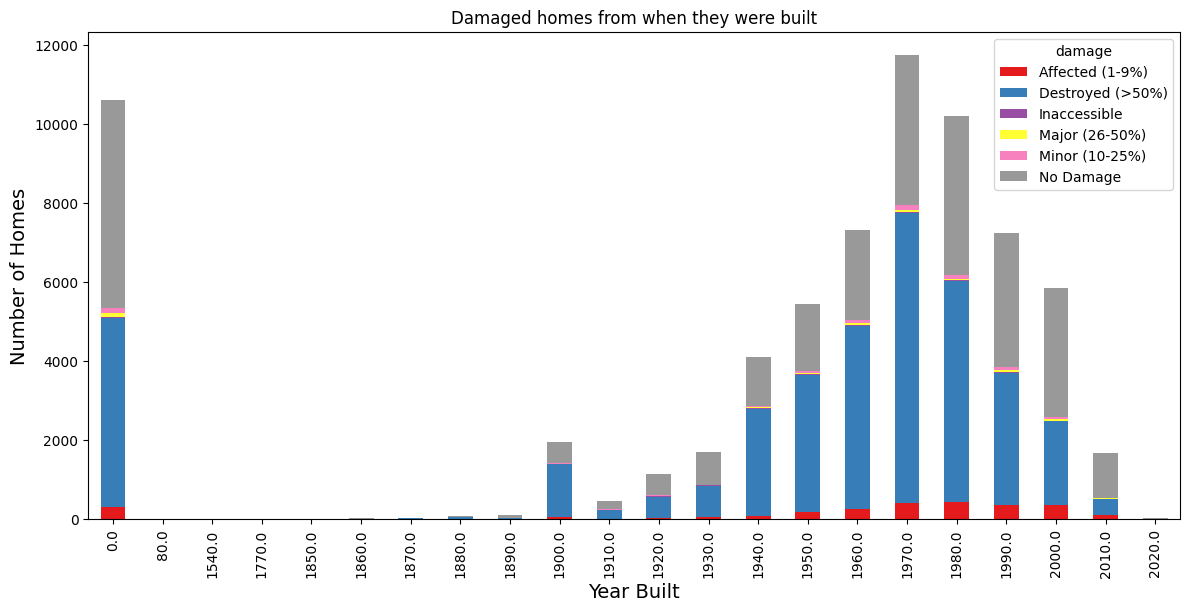

In [45]:
#grouping data by decades and summing the damage
damage_by_date = new_geo_data.groupby(['decade', 'damage']).size().unstack().fillna(0)


damage_by_date.plot(kind='bar', stacked=True, cmap='Set1', figsize=(12,6))
plt.xlabel('Year Built', fontsize=14)
plt.ylabel('Number of Homes',fontsize=14)
plt.tight_layout()

plt.title("Damaged homes from when they were built")
plt.show()

damage
Destroyed (>50%)    53879
No Damage           40895
Affected (1-9%)      3438
Minor (10-25%)       1018
Major (26-50%)        564
Inaccessible          436
Name: count, dtype: int64


Text(0.5, 1.0, 'Number of homes damaged')

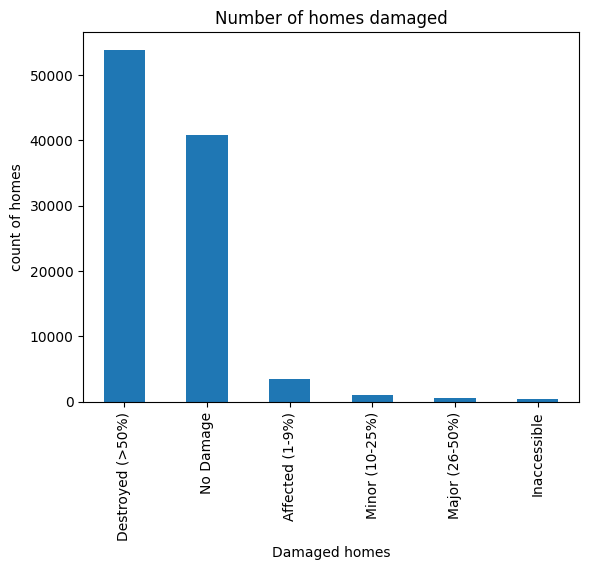

In [60]:
#Plotting the number of damaged homes
number_damaged_homes = new_geo_data['damage'].value_counts()
print(number_damaged_homes)


number_damaged_homes.plot(kind='bar')
plt.xlabel('Damaged homes')
plt.ylabel('count of homes')
plt.title('Number of homes damaged')

In [71]:
new_geo_data['county'].value_counts()

county
Butte              28715
Sonoma             11721
Napa                6279
El Dorado           4639
Santa Cruz          4637
Shasta              3781
Los Angeles         3770
Plumas              3585
Ventura             3423
Lake                3140
Fresno              2917
Orange              2510
Solano              2377
Siskiyou            1810
Kern                1476
Riverside           1226
Mariposa            1139
Tehama              1119
Calaveras           1090
Tulare              1020
Lassen               964
Mendocino            937
San Diego            933
San Bernardino       922
Madera               740
Monterey             699
Placer               606
Santa Clara          589
Trinity              572
Alpine               415
Santa Barbara        362
Nevada               344
Yuba                 324
Yolo                 278
Stanislaus           224
San Mateo            207
Alameda              120
San Joaquin          104
San Luis Obispo      103
Amador            

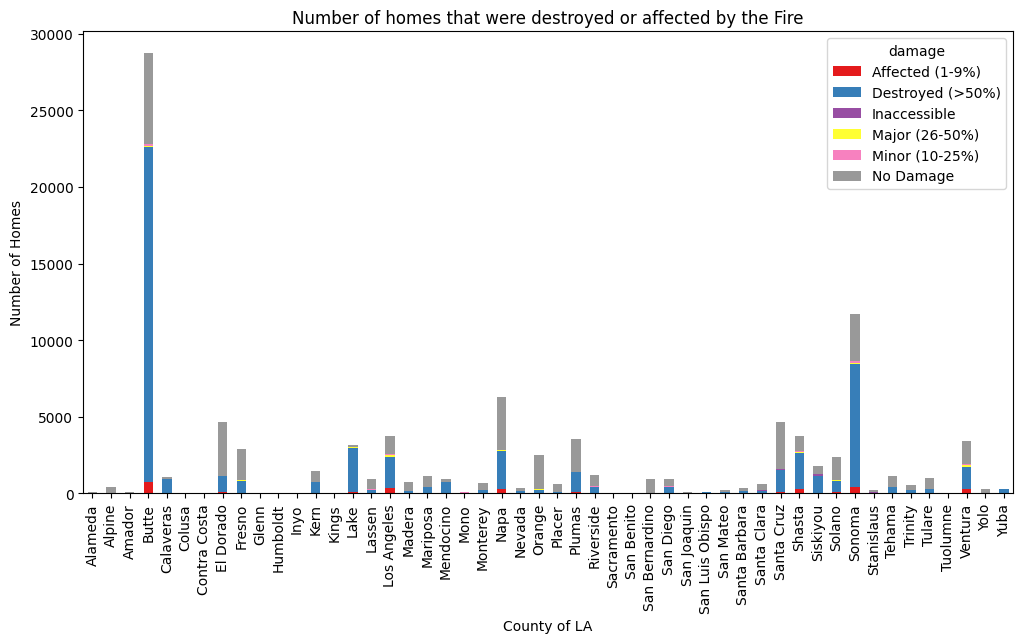

In [85]:
damaged_by_county = new_geo_data.groupby(['county', 'damage']).size().fillna(0).unstack()

damaged_by_county.plot(kind='bar', stacked=True, colormap='Set1', figsize=(12,6))

plt.title('Number of homes that were destroyed or affected by the Fire')
plt.ylabel('Number of Homes')
plt.xlabel('County of LA')
plt.show()

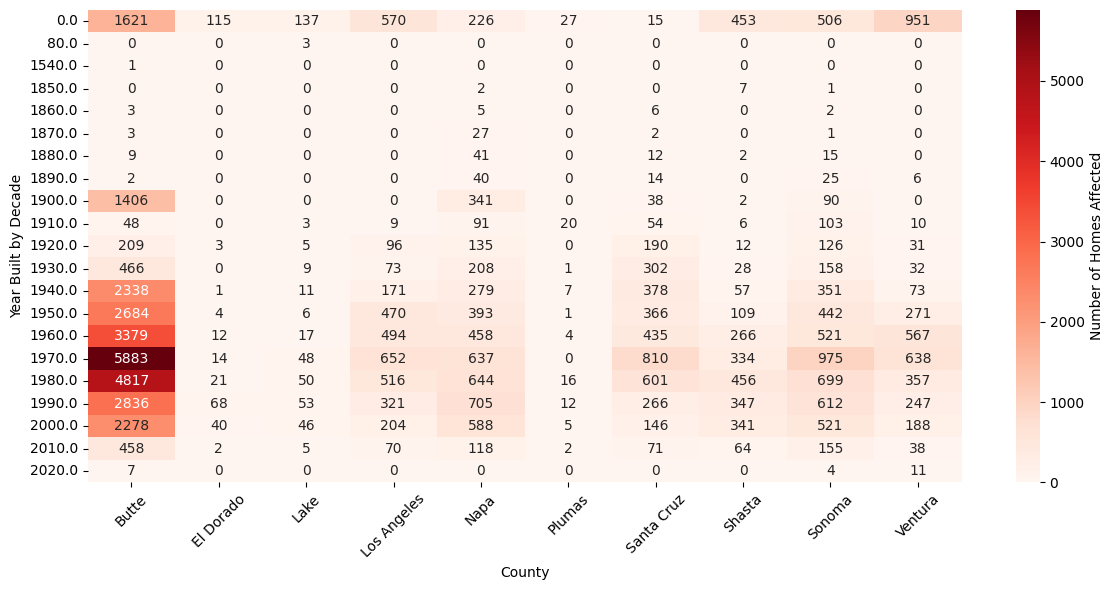

In [101]:
# Filter top counties by total damage
top_counties = (new_geo_data.groupby('county')['damage']
                .count()
                .sort_values(ascending=False)
                .head(10)
                .index)

top_counties

# Filter data for top counties
filtered_data = new_geo_data[new_geo_data['county'].isin(top_counties)]

# Group data by decade and county
heatmap_data = filtered_data.groupby(['decade', 'county'])['damage'].count().unstack(fill_value=0)


# Plot heatmap
plt.figure(figsize=(12, 6))

sns.heatmap(heatmap_data, cmap="Reds", annot=True, fmt='d', cbar_kws= {'label': 'Number of Homes Affected'})

plt.xticks(rotation=45)
plt.xlabel('County')
plt.ylabel('Year Built by Decade')
plt.tight_layout()
plt.show()
